# Map-matching a track

On peut mapper une trace sur un réseau (mapOnNetwork), un raster sur une trace (mapOnRaster), une trace sur une autre trace (mapOn).

## Import de la librairie tracklib

In [1]:
import matplotlib.pyplot as plt
import os
import sys

#-------------------------------------------------------
# Import de tracklib

module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Map-matching a track on a network

### Read GPX data

In [2]:
import matplotlib.pyplot as plt

# On charge les données
from tracklib.core.ObsTime import ObsTime
from tracklib.io.TrackReader import TrackReader
from tracklib.io.NetworkReader import NetworkReader
from tracklib.core.SpatialIndex import SpatialIndex
import tracklib.algo.Mapping as mapping

ObsTime.setReadFormat("4Y/2M/2D 2h:2m:2s")
trackpath = '/home/marie-dominique/tracklib/tracklib/data/gpx/utgtrack-22245.csv'
netpath = '/home/marie-dominique/tracklib/tracklib/data/network/network-utgtrack-22245.csv'

# ================================================================

trace = TrackReader.readFromCsv(path=trackpath, id_E=0, id_N=1, id_T=6,
                                  srid="GeoCoords", h=1,
                                  separator = ',', verbose = True)
trace.toENUCoordsIfNeeded()
trace.summary()

Loading file /home/marie-dominique/tracklib/tracklib/data/gpx/utgtrack-22245.csv
  File /home/marie-dominique/tracklib/tracklib/data/gpx/utgtrack-22245.csv loaded: 52 point(s) registered
-------------------------------------
GPS track #utgtrack-22245 of user 0:
-------------------------------------
  Nb of pt(s):   52
  Ref sys id   : ENU
  Starting at  : 12/07/2019 15:42:35
  Ending at    : 12/07/2019 16:48:16
  Duration     : 3941.000 s
  Length       : 1325.334 m
-------------------------------------



### Read the network

In [3]:
network = NetworkReader.readFromFile(netpath, formatfile = 'VTT')
network.toENUCoords(trace.base)
print ('nb edges=', len(network.EDGES))
print ('nb nodes=', len(network.NODES))
print ('total length=', network.totalLength())



100% (289 of 289) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


Loading network...
nb edges= 288
nb nodes= 216
total length= 19386.544826479818


### Prepare and launch the map matching

In [4]:
si = SpatialIndex(network)
network.spatial_index = si



  0% (0 of 288) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

Building [100 x 80] spatial index...


100% (288 of 288) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


In [5]:
# computes all distances between pairs of nodes
network.prepare()



 30% (66 of 216) |#######                | Elapsed Time: 0:00:00 ETA:   0:00:00

Computing all pairs shortest distances...


100% (216 of 216) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


In [6]:
# Map track on network
mapping.mapOnNetwork(trace, network, search_radius=25, debug=False)



100% (52 of 52) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (51 of 51) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Map-matching preparation...
Compilation of states on track
Cost and marker matrix initialization
Compilation of observations on track
Optimal sequence computation
Backward reconstruction phase
---------------------------------------------------------------------
                    MAP MATCHING REPORT FILE                         
---------------------------------------------------------------------
* General information
Date : 12/03/2023 22:45:23
User : marie-dominique
System : Linux-x86_64
Python version : 3.9.1
Heap memory : 108 Mo
---------------------------------------------------------------------
* Input tracks 
Number of tracks = 1
---------------------------------------------------------------------
* Input network
Number of edges = 288
Number of nodes = 216
---------------------------------------------------------------------
* Computation parameters


### Display results 

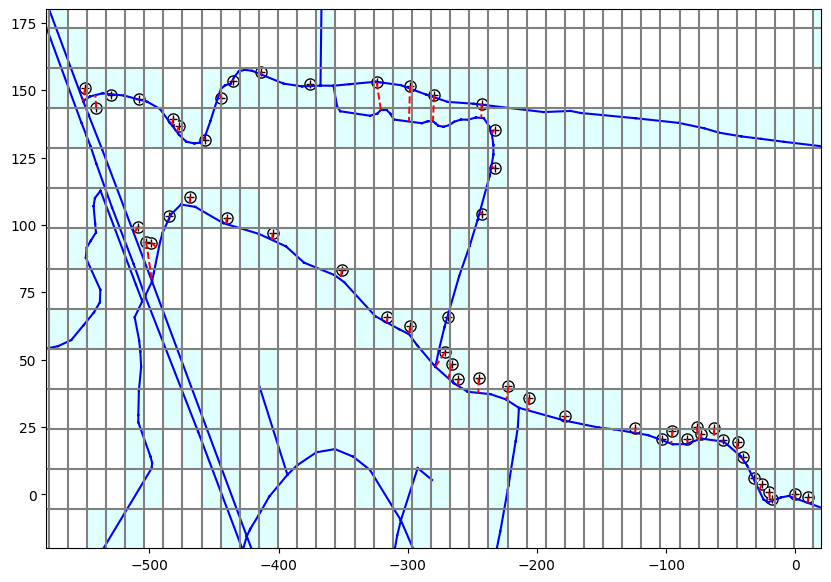

In [7]:
plt.figure(figsize = (10, 7))

# emprise = trace.bbox()
plt.xlim([-580, 20])
plt.ylim([-20, 180])

trace.plotAsMarkers(append=True)
network.plot('b-', '', '', '', 1.5, plt)
si.plot(base=False, append=True)

for k in range(len(trace)):
    X = [trace[k].position.getX(), trace["hmm_inference", k][0].getX()]
    Y = [trace[k].position.getY(), trace["hmm_inference", k][0].getY()]
    plt.plot(X, Y, "r--", linewidth=1.4)
    trace[k].position.setX(trace["hmm_inference", k][0].getX())
    trace[k].position.setY(trace["hmm_inference", k][0].getY())

## Mapping a raster on a track

In [8]:
from tracklib.core.ObsTime import ObsTime
from tracklib.io.RasterReader import RasterReader
from tracklib.io.TrackReader import TrackReader
import tracklib.algo.Mapping as mapping


ObsTime.setReadFormat("4Y/2M/2D 2h:2m:2s")
trace = TrackReader.readFromCsv('/home/marie-dominique/tracklib/tracklib/data/asc/8961191_v3.csv', 
                                id_E=0, id_N=1, id_U=3, id_T=4, 
                                separator=",", h=1)
trace.summary()
#trace.plot()


chemin = '/home/marie-dominique/tracklib/tracklib/data/asc/test.asc'
raster = RasterReader.readFromAscFile(chemin, name='mnt')
band = raster.getRasterBand(0)  # bands.get('mnt')
band.summary()
#print ('ele MNT VT:', band.grid[465][1151])

mapping.mapOnRaster(trace, raster)
print (trace.getListAnalyticalFeatures())


for j in range(trace.size()):
    pos = trace.getObs(j).position
    if pos.getX() == 942323.41762134002055973:
        print ('ele MNT AF:', trace.getObsAnalyticalFeature('mnt', j))
        print ('ele Z:', pos.getZ())

-------------------------------------
GPS track #8961191_v3 of user 0:
-------------------------------------
  Nb of pt(s):   363
  Ref sys id   : ENU
  Starting at  : 02/08/2018 13:42:42
  Ending at    : 03/08/2018 07:04:42
  Duration     : 62520.000 s
  Length       : 19636.023 m
-------------------------------------

-------------------------------------
Grid 'mnt':
-------------------------------------
       nrows = 2000
       ncols = 2000
       XPixelSize = 5.0
       YPixelSize = 5.0
   Bounding box: 
       Lower left corner : 939997.5,6430002.5
       Upper right corner: 949997.5,6440002.5
-------------------------------------

['mnt']
ele MNT AF: 2006.0
ele Z: 2002.007
